In [1]:
# Modules

import numpy as np
import scipy.integrate as spint
import scipy.stats as spstat
import matplotlib.pyplot as plt

In [2]:
data = np.load("03_results_out.npz")
all_result = data['results']

(-6.0, 6.0)

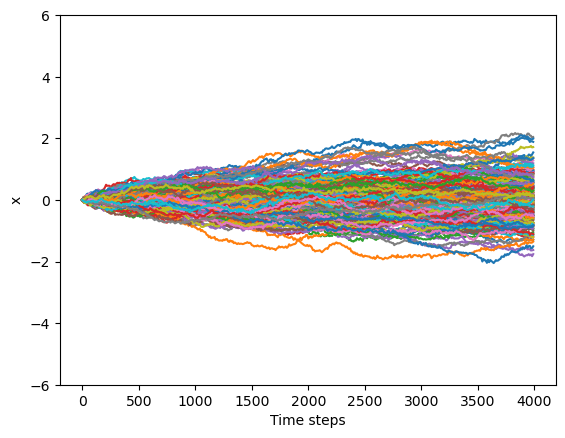

In [3]:
# Checking the drifts in diffrent samples in case 0

for y in all_result[:,0,:]:
    plt.plot(np.arange(0, len(y),10), y[::10])
plt.xlabel("Time steps")
plt.ylabel("x")

plt.ylim(-6,6)

(-6.0, 6.0)

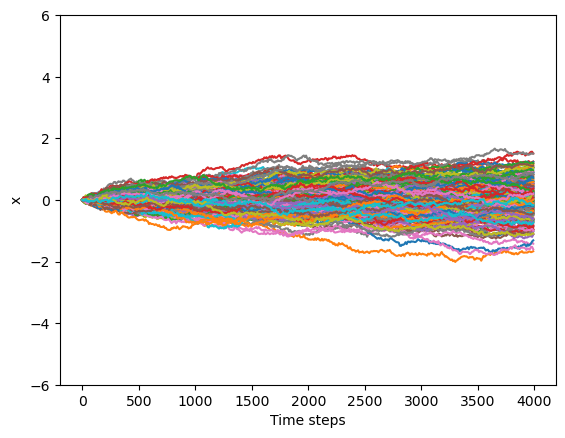

In [4]:
# Checking the drifts in diffrent samples in case 1

for y in all_result[:,1,:]:
    plt.plot(np.arange(0, len(y),10), y[::10])
plt.xlabel("Time steps")
plt.ylabel("x")
plt.ylim(-6,6)

In [5]:
# Calculate the mean square

case_0_var = np.mean(np.square(all_result[:,0,:]), axis=0)
case_1_var = np.mean(np.square(all_result[:,1,:]), axis=0)

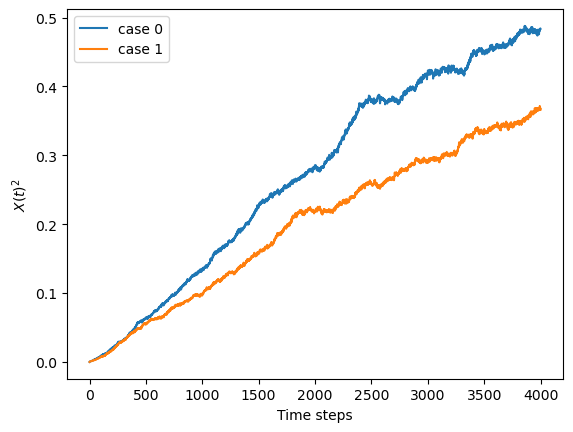

In [6]:
# Plotting the mean square

plt.plot(case_0_var, label="case 0")
plt.plot(case_1_var, label="case 1")
plt.xlabel("Time steps")
plt.ylabel("$X(t)^2$")
plt.legend()

In [7]:
data_Ds = np.load("04_Ds.npz")

beta_Ds = data_Ds['beta']
Ds_Ds = data_Ds['Ds']

data_Ds_pred = np.load("08_Ds_Pred.npz")

beta_Ds_pred = data_Ds_pred['beta']
Ds_Ds_pred = data_Ds_pred['Ds']

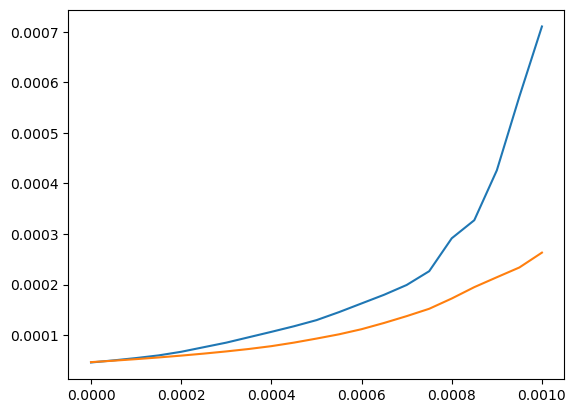

In [8]:
plt.plot(beta_Ds, Ds_Ds)

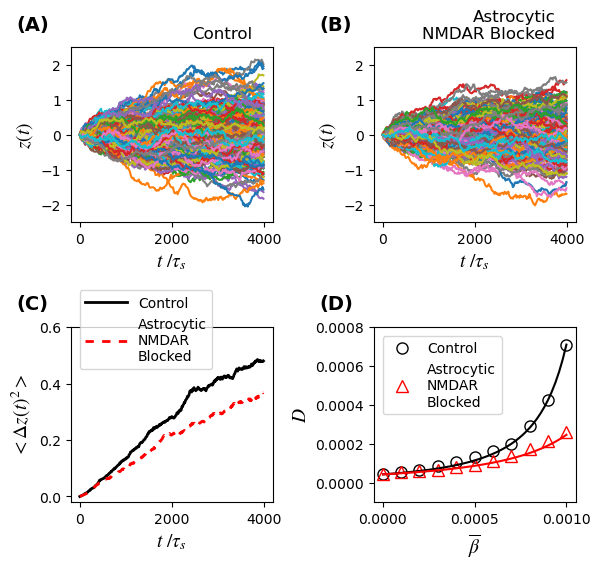

In [11]:
fig, axes = plt.subplots(2,2, figsize=(15/2.525, 14/2.525))


plt.rcParams['mathtext.fontset'] = 'stix'    
hfont = {'fontname':'Sans'}

# Checking the drifts in different samples in case 0

for y in all_result[::1,0,:]:
    axes[0,0].plot(np.arange(0, len(y),20), y[::20])
axes[0,0].set_xlabel(r"$t~/ \tau_s$", fontsize=14)
axes[0,0].set_ylabel("$z(t)$", fontsize=14)

for y in all_result[::1,1,:]:
    axes[0,1].plot(np.arange(0, len(y),20), y[::20])
axes[0,1].set_xlabel(r"$t~/ \tau_s$", fontsize=14)
axes[0,1].set_ylabel("$z(t)$", fontsize=14)

axes[0,0].set_ylim(-2.5,2.5)
axes[0,1].set_ylim(-2.5,2.5)

# Plotting the mean square

axes[1,0].plot(np.arange(len(case_0_var))[::10], case_0_var[::10], "k-", linewidth=2, label="Control")
axes[1,0].plot(np.arange(len(case_1_var))[::10], case_1_var[::10], "r-.", dashes=(3, 3), linewidth=2, label="Astrocytic\nNMDAR\nBlocked")
axes[1,0].set_xlabel(r"$t~/ \tau_s$", fontsize=14)
axes[1,0].set_ylabel("$<\Delta z(t)^2>$", fontsize=14)
axes[1,0].set_ylim(-0.02,0.6)
axes[1,0].legend(loc="upper left", bbox_to_anchor=(0.01, 1.25), handlelength=3)

axes[1,1].plot(beta_Ds[::2], Ds_Ds[::2,0], "ko", mfc='none', ms=8, label="Control")
axes[1,1].plot(beta_Ds[::2], Ds_Ds[::2,1], "r^", mfc='none', ms=8, label="Astrocytic\nNMDAR\nBlocked")

axes[1,1].plot(beta_Ds_pred, Ds_Ds_pred[:,0], "k-", mfc='none', label=None)
axes[1,1].plot(beta_Ds_pred, Ds_Ds_pred[:,1], "r-", mfc='none', label=None)

axes[1,1].set_xlabel(r"$\overline{\beta}$", fontsize=14)
axes[1,1].set_ylabel(r"$D$", fontsize=14)
axes[1,1].set_ylim(-0.0001,0.0008)
axes[1,1].legend(loc="upper left", bbox_to_anchor=(0.01, 0.99), handlelength=2)

axes[0,0].text(-0.27,1.1,"(A)", transform=axes[0,0].transAxes, fontsize=14, weight="bold", **hfont)
axes[0,1].text(-0.27,1.1,"(B)", transform=axes[0,1].transAxes, fontsize=14, weight="bold", **hfont)
axes[1,0].text(-0.27,1.1,"(C)", transform=axes[1,0].transAxes, fontsize=14, weight="bold", **hfont)
axes[1,1].text(-0.27,1.1,"(D)", transform=axes[1,1].transAxes, fontsize=14, weight="bold", **hfont)

axes[0,0].text(0.9,1.05,"Control", ha="right", transform=axes[0,0].transAxes, 
               fontsize=12, **hfont)
axes[0,1].text(0.9,1.05,"Astrocytic\nNMDAR Blocked", ha="right", 
               transform=axes[0,1].transAxes, fontsize=12, **hfont)

plt.subplots_adjust(left=0.11, right=0.96, top=0.92, bottom=0.1, hspace=0.6, wspace=0.5)
# plt.tight_layout()

plt.savefig("Figure_06.pdf")

In [10]:
Ds_Ds

array([[4.58916229e-05, 4.65762208e-05],
       [5.00316184e-05, 4.94347415e-05],
       [5.46343633e-05, 5.25033121e-05],
       [5.99072948e-05, 5.58417523e-05],
       [6.70442178e-05, 5.94706895e-05],
       [7.61108422e-05, 6.34287054e-05],
       [8.51390676e-05, 6.77721157e-05],
       [9.58276581e-05, 7.25892793e-05],
       [1.06500347e-04, 7.81866206e-05],
       [1.17514520e-04, 8.51727306e-05],
       [1.29640846e-04, 9.31612050e-05],
       [1.45506988e-04, 1.01596026e-04],
       [1.62678879e-04, 1.11735233e-04],
       [1.79836540e-04, 1.24096190e-04],
       [1.99177841e-04, 1.37575360e-04],
       [2.26455751e-04, 1.52110352e-04],
       [2.91555539e-04, 1.72443176e-04],
       [3.27323210e-04, 1.94909078e-04],
       [4.26005046e-04, 2.14492777e-04],
       [5.71920627e-04, 2.33821618e-04],
       [7.10537904e-04, 2.63190563e-04]])